**PART 1 - MATCH DATA**

**"Statistical Comparison Between the Winning Countries in Football based on Several Terms"**

Abstract

In this part I will analyze the probability of winning and losing for 2 countries, USA and France. They are the 2 most repeated countries in the data. I will compare between friendly/official matches as well as the difference in playing in home/away. There will also be a comparison of their confidence intervals, and interpret these results. 

In [83]:
import pandas as pd

In [84]:
df=pd.read_csv("results.csv")

In [85]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [86]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]
values= ['win','lose','draw']

In [87]:
import numpy as np
df['result'] = np.select(conditions, values)
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,lose


In [88]:
df['country'].value_counts().head(2)

In [89]:
df['result'].value_counts()

In [90]:
x=df['result'].value_counts()
x=np.array(x)
x

In [91]:
dfus=df[df['country']=='United States']

In [92]:
t=dfus['result'].value_counts()
t

In [93]:
totalus=dfus['result'].value_counts().sum()
totalus

1237

In [94]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [95]:
CI_US_WIN95=proportion_confint(count=t[1],nobs=totalus,alpha=(1-.95))
CI_US_WIN95

(0.28227601058123425, 0.33373045667826456)

In [96]:
CI_US_LOSE95=proportion_confint(count=t[0],nobs=totalus,alpha=(1-.95))
CI_US_LOSE95

(0.426578136216548, 0.48207182336308013)

In [97]:
dffr=df[df['country']=='France']

In [98]:
s=dffr['result'].value_counts()
totalfr=dffr['result'].value_counts().sum()
s

In [99]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [100]:
CI_FR_WIN95=proportion_confint(count=s[1],nobs=totalfr,alpha=(1-.95))
CI_FR_WIN95

(0.22914098273764907, 0.28919642557530933)

In [101]:
CI_FR_LOSE95=proportion_confint(count=s[0],nobs=totalfr,alpha=(1-.95))
CI_FR_LOSE95

(0.47552223946938266, 0.5440376627311064)

In [102]:
conditions = [
    (dfus['tournament']=='Friendly'),
    (dfus['tournament']!='Friendly')
    ]

In [103]:
values=['Friendly','Official']

In [104]:
dfus['typematch'] = np.select(conditions, values)

<ipython-input-104-f9ec8053ded4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['typematch'] = np.select(conditions, values)


In [105]:
dfus['typematch'].value_counts()

In [106]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [107]:
x=np.array(x)
x

In [108]:
CI_uswin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_friendly

(0.3096072474351973, 0.38258264536725295)

In [109]:
CI_uswin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_official

(0.22959939266607973, 0.30122252514213943)

In [110]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,Typematch,lb,ub
0,Friendly,0.309607,0.382583
1,Official,0.229599,0.301223


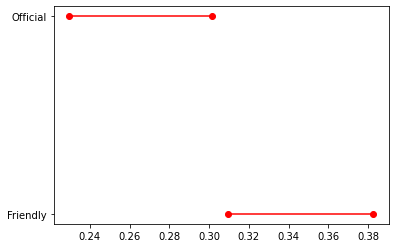

In [111]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

In [112]:
dfus['home'] = np.select(conditions, values)

<ipython-input-112-d30cd10e610e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['home'] = np.select(conditions, values)


In [113]:
dfus['home'].value_counts()

In [114]:
x=pd.crosstab(dfus['home'],dfus['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [115]:
x=np.array(x)
x

In [116]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.22959939266607973, 0.30122252514213943)

In [117]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.3096072474351973, 0.38258264536725295)

In [118]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.229599,0.301223
1,No,0.309607,0.382583


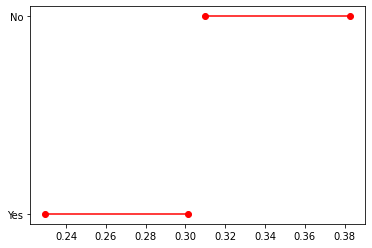

In [119]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [120]:
conditions = [
    (dffr['tournament']=='Friendly'),
    (dffr['tournament']!='Friendly')
    ]

In [121]:
values=['Friendly','Official']

In [122]:
dffr['typematch'] = np.select(conditions, values)

<ipython-input-122-1982b2d9861e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffr['typematch'] = np.select(conditions, values)


In [123]:
dffr['typematch'].value_counts()

In [124]:
x=pd.crosstab(dffr['typematch'],dffr['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,112,228,131,471
Official,77,189,81,347
All,189,417,212,818


In [125]:
x=np.array(x)
x

In [126]:
CI_frwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frwin_friendly

(0.2376654895121334, 0.3185977801269324)

In [127]:
CI_frwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frwin_official

(0.18892148425887595, 0.27793730536648426)

In [128]:
ci_frwin = {}
ci_frwin['typematch'] = ['Friendly','Official']
ci_frwin['lb'] = [CI_frwin_friendly[0],CI_frwin_official[0]]
ci_frwin['ub'] = [CI_frwin_friendly[1],CI_frwin_official[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.229599,0.301223
1,No,0.309607,0.382583


KeyError: KeyError: 'typematch'

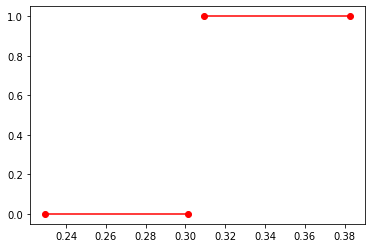

In [129]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['typematch']))

In [81]:
dffr['home']=(dffr['home_team']=='France')

<ipython-input-81-c0bdd4779af4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffr['home']=(dffr['home_team']=='France')


In [82]:
dffr['home'].value_counts()

In [83]:
x=pd.crosstab(dffr['typematch'],dffr['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,112,228,131,471
Official,77,189,81,347
All,189,417,212,818


In [84]:
x=np.array(x)
x

In [85]:
CI_frwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frwin_home

(0.18892148425887595, 0.27793730536648426)

In [86]:
CI_frwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frwin_away

(0.2376654895121334, 0.3185977801269324)

In [87]:
ci_frwin = {}
ci_frwin['home'] = ['Yes','No']
ci_frwin['lb'] = [CI_frwin_home[0],CI_frwin_away[0]]
ci_frwin['ub'] = [CI_frwin_home[1],CI_frwin_away[1]]
df_ci= pd.DataFrame(ci_frwin)
df_ci

,home,lb,ub
0,Yes,0.188921,0.277937
1,No,0.237665,0.318598


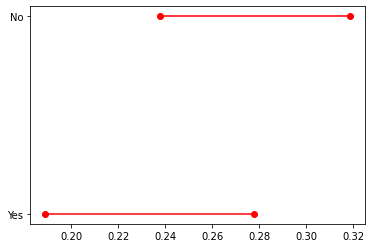

In [88]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

**Discussion and Conclusion of Results**

For both the USA and France, they win more friendly matches than official ones. This could be because friendly matches are less regulated, so they are less stressful for the players. Official matches are regulated by FIFA, and every goal counts, which puts pressure on the players. Also, in friendly matches, the teams can play against any other teams, which can increase their probability of winning (if they play against an easy team). For official matches, they have to play in a certain cup/league which is a lot more competitive. 

The USA and France also won more home matches than away matches. This could be because of having a home advantage, where the players are familiar with the field and the atmosphere. It could also be because of the large fan base that attends the match when the team plays on the homeland. Therefore, the cheering gives the players a confidence boost and pushes them to play better and score more goals. 
From the confidence intervals and graphs, we can see that "no" has a higher probability, but it also has a higher margin of error, and we want a smaller interval to have more precise and accurate data.


**Part 2 - COVID DATA**

**Abstract**

In this part I will analyze the number of cases in Italy over the months in the period from 2020 to 2021. These cases will be discussed in relation to region, income level, and continent. I will also analyze the case fatality rate and how it changed over time. 

**Analysis of CoronaVirus Pandemic Over the Period Between 2020 and 2021**

In [1]:
import pandas as pd

In [157]:
df1=pd.read_csv('covid_data.csv',encoding='latin-1')
df1.head(5)

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [3]:
df1['dcases'].sum()

289138394

In [158]:
df1['ddeaths'].sum()

5441088

In [161]:
df1['totcases'] = df1.groupby(['iso3c'])['dcases'].cumsum()

In [162]:
df1['totdeaths'] = df1.groupby(['iso3c'])['ddeaths'].cumsum()

In [163]:
df1['cfr']=df1['totdeaths']/df1['totcases']
df1['cfr']

In [164]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df1['month'].astype(cat_type)

In [19]:
import numpy as np

In [165]:
dfitaly=df1[df1['country']=='Italy']

In [28]:
statsm=dfitaly.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})
statsm

dcases 
 
 
 
 mean 
 std 
 size 
 
 
 month 
 
 
 
 
 
 
 
 Jan 
 13933.375000 
 4153.673879 
 32 
 
 
 Feb 
 6550.157895 
 7087.868330 
 57 
 
 
 Mar 
 12327.387097 
 9538.507570 
 62 
 
 
 Apr 
 8957.083333 
 6294.353578 
 60 
 
 
 May 
 3591.967742 
 3428.237314 
 62 
 
 
 Jun 
 830.283333 
 768.894873 
 60 
 
 
 Jul 
 1565.774194 
 1927.797337 
 62 
 
 
 Aug 
 3413.548387 
 2893.262613 
 62 
 
 
 Sep 
 2966.850000 
 1726.120366 
 60 
 
 
 Oct 
 7486.758065 
 7653.189368 
 62 
 
 
 Nov 
 19645.100000 
 12182.697904 
 60 
 
 
 Dec 
 25850.774194 
 25288.347597 
 62

In [29]:
import numpy as np
import scipy.stats

In [30]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [31]:
ci95_hi = []
ci95_lo = []

In [32]:
for i in statsm.index:
    m, s, n = statsm.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [33]:
ci95_hi

[15454.896597579496,
 8447.53985281795,
 14769.48888431799,
 10596.809075245104,
 4469.6841363432595,
 1030.5861444049117,
 2059.3395953838144,
 4154.297581517585,
 3416.5171443142563,
 9446.17019452278,
 22818.78306586521,
 32325.23766879297]

In [34]:
ci95_lo

[12411.853402420504,
 4652.775936655735,
 9885.285309230396,
 7317.357591421564,
 2714.2513475277087,
 629.9805222617549,
 1072.2087917129597,
 2672.7991926759632,
 2517.1828556857436,
 5527.345934509478,
 16471.416934134788,
 19376.3107183038]

In [35]:
statsm['ci95_hi'] = ci95_hi
statsm['ci95_lo'] = ci95_lo
print(statsm)

             dcases                          ci95_hi       ci95_lo
               mean           std size                            
month                                                             
Jan    13933.375000   4153.673879   32  15454.896598  12411.853402
Feb     6550.157895   7087.868330   57   8447.539853   4652.775937
Mar    12327.387097   9538.507570   62  14769.488884   9885.285309
Apr     8957.083333   6294.353578   60  10596.809075   7317.357591
May     3591.967742   3428.237314   62   4469.684136   2714.251348
Jun      830.283333    768.894873   60   1030.586144    629.980522
Jul     1565.774194   1927.797337   62   2059.339595   1072.208792
Aug     3413.548387   2893.262613   62   4154.297582   2672.799193
Sep     2966.850000   1726.120366   60   3416.517144   2517.182856
Oct     7486.758065   7653.189368   62   9446.170195   5527.345935
Nov    19645.100000  12182.697904   60  22818.783066  16471.416934
Dec    25850.774194  25288.347597   62  32325.237669  19376.31

In [36]:
df_ci= pd.DataFrame(statsm)
df_ci

dcases 
 ci95_hi 
 ci95_lo 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 month 
 
 
 
 
 
 
 
 
 
 Jan 
 13933.375000 
 4153.673879 
 32 
 15454.896598 
 12411.853402 
 
 
 Feb 
 6550.157895 
 7087.868330 
 57 
 8447.539853 
 4652.775937 
 
 
 Mar 
 12327.387097 
 9538.507570 
 62 
 14769.488884 
 9885.285309 
 
 
 Apr 
 8957.083333 
 6294.353578 
 60 
 10596.809075 
 7317.357591 
 
 
 May 
 3591.967742 
 3428.237314 
 62 
 4469.684136 
 2714.251348 
 
 
 Jun 
 830.283333 
 768.894873 
 60 
 1030.586144 
 629.980522 
 
 
 Jul 
 1565.774194 
 1927.797337 
 62 
 2059.339595 
 1072.208792 
 
 
 Aug 
 3413.548387 
 2893.262613 
 62 
 4154.297582 
 2672.799193 
 
 
 Sep 
 2966.850000 
 1726.120366 
 60 
 3416.517144 
 2517.182856 
 
 
 Oct 
 7486.758065 
 7653.189368 
 62 
 9446.170195 
 5527.345935 
 
 
 Nov 
 19645.100000 
 12182.697904 
 60 
 22818.783066 
 16471.416934 
 
 
 Dec 
 25850.774194 
 25288.347597 
 62 
 32325.237669 
 19376.310718

In [38]:
df_ci['month']=df_ci.index
df_ci

dcases 
 ci95_hi 
 ci95_lo 
 month 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 
 month 
 
 
 
 
 
 
 
 
 
 
 Jan 
 13933.375000 
 4153.673879 
 32 
 15454.896598 
 12411.853402 
 Jan 
 
 
 Feb 
 6550.157895 
 7087.868330 
 57 
 8447.539853 
 4652.775937 
 Feb 
 
 
 Mar 
 12327.387097 
 9538.507570 
 62 
 14769.488884 
 9885.285309 
 Mar 
 
 
 Apr 
 8957.083333 
 6294.353578 
 60 
 10596.809075 
 7317.357591 
 Apr 
 
 
 May 
 3591.967742 
 3428.237314 
 62 
 4469.684136 
 2714.251348 
 May 
 
 
 Jun 
 830.283333 
 768.894873 
 60 
 1030.586144 
 629.980522 
 Jun 
 
 
 Jul 
 1565.774194 
 1927.797337 
 62 
 2059.339595 
 1072.208792 
 Jul 
 
 
 Aug 
 3413.548387 
 2893.262613 
 62 
 4154.297582 
 2672.799193 
 Aug 
 
 
 Sep 
 2966.850000 
 1726.120366 
 60 
 3416.517144 
 2517.182856 
 Sep 
 
 
 Oct 
 7486.758065 
 7653.189368 
 62 
 9446.170195 
 5527.345935 
 Oct 
 
 
 Nov 
 19645.100000 
 12182.697904 
 60 
 22818.783066 
 16471.416934 
 Nov 
 
 
 Dec 
 25850.774194 
 25288.347597 
 62 
 32325.237669 
 19376.310718 
 Dec

In [39]:
import matplotlib.pyplot as plt

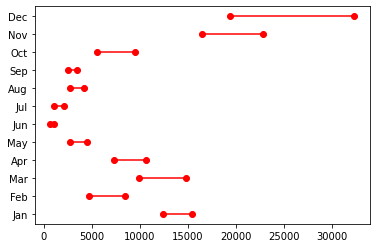

In [40]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))

**COVID Cases by Income**

In [41]:
import pandas as pd
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [50]:
df['income'].unique()

In [53]:
from pandas.api.types import CategoricalDtype
cats=['Low income', 'Lower middle income', 'Upper middle income','High income',]
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['income'] = df['income'].astype(cat_type)

In [52]:
dfitaly=df[df['country']=='Italy']

In [68]:
import numpy as np

In [69]:
stats=dfitaly.groupby("income").agg({"dcases": [np.mean, np.std, np.size]})

In [55]:
stats=pd.DataFrame(stats)
stats.shape

(1, 3)

In [56]:
stats.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [77]:
stats.columns=['mean','std','size']
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [184]:
x=dfitaly['dcases']

In [187]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [188]:
get_ci_lb(x)

AttributeError: AttributeError: 'Series' object has no attribute 'ppf'

In [166]:
df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,totcases,totdeaths,cfr
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,5,0,0.000000
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,5,0,0.000000
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,5,0,0.000000
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,5,0,0.000000
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,5,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,205455,4908,0.023888
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,207554,4940,0.023801
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,207554,4940,0.023801
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,211734,4997,0.023600


In [168]:
df1['date'][0]

'2020-02-24'

In [170]:
df1['year'] = pd. DatetimeIndex(df1['date']). year
df1['year'][0]

2020

**Discussion and Conclusion of Results**

High income countries have a large number of deaths compared to low income countries. This can be due to the high number of elderly population in developed countries as opposed to developing ones. We can also see that for Italy, the highest number of deaths occured during the winter months. This can be due to several reasons. Firstly, people in winter have lower immunity and the virus travels faster in colder climates, so more people catch COVID. Secondly, it can be due to the fact that COVID started in winter and people didn't know how to react to it as it was a new pandemic. Therefore, there was a lot of panic and not enough health awareness to deal with COVID. Moreover, the healthcare system of Italy failed to adapt to the increasing number of patients, which caused a higher mortality rate. 